In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

c:\Users\KTH\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [16]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.figure(figsize=(16,12))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [4]:
def box_inpaint(X, img_dim, box_size, margin_size=5):
    x = torch.randint(low=margin_size, high=img_dim-box_size-margin_size, size=[1])
    y = torch.randint(low=margin_size, high=img_dim-box_size-margin_size, size=[1])
    mask = torch.ones(X.size(), device=X.device)
    mask[..., x:x+box_size, y:y+box_size] = 0
    return X * mask

In [ ]:
def gaussian_noise(X, sigma=0.05):
    return torch.randn_like(X, device=X.device) * sigma  + X

Original Image X


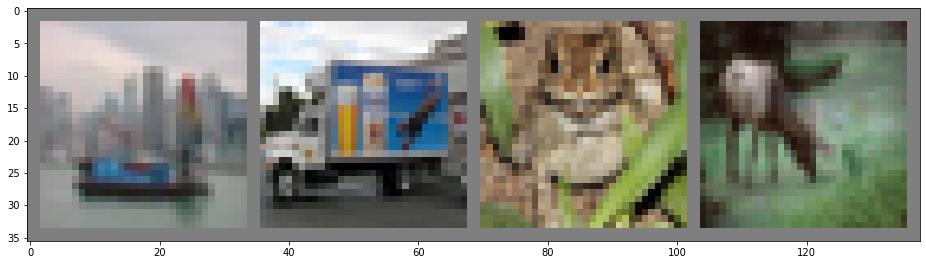

Inpainting: A(X)


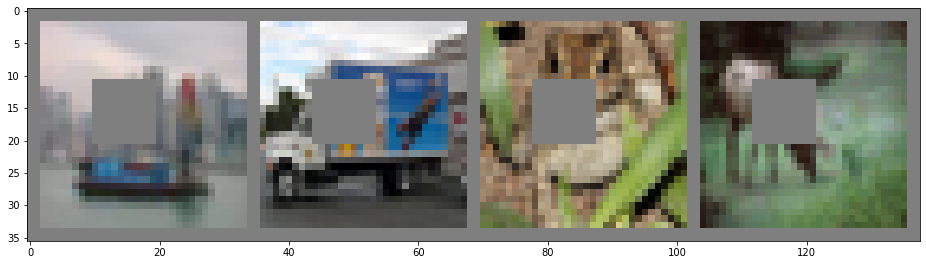

Complete forward measurement: y = A(X) + n


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.042672515..1.048475].


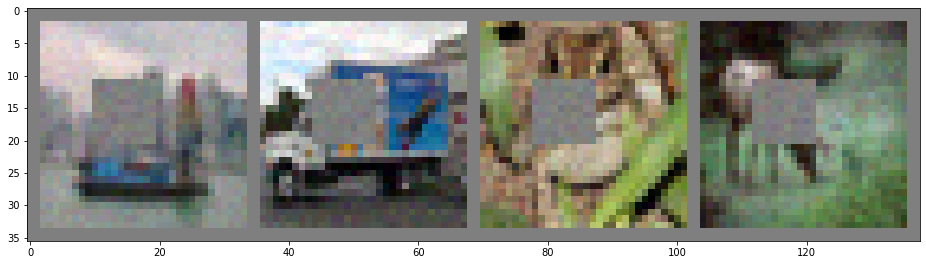

In [17]:
for i, (X, Y) in enumerate(trainloader):
    print("Original Image X")
    imshow(torchvision.utils.make_grid(X))
    print("Inpainting: A(X)")
    X_inpainted = box_inpaint(X, img_dim=32, box_size=10)
    imshow(torchvision.utils.make_grid(X_inpainted))
    print("Complete forward measurement: y = A(X) + n")
    X_noise = gaussian_noise(X_inpainted)
    imshow(torchvision.utils.make_grid(X_noise))
    break